# GA - Example 10.3-6 Job sequencing
<br>
p.38의 Job seqeuncing 문제를 GA로 구현하겠습니다.

## 1. Initialization setting
<br>
GA를 구현하기 위해 먼저 필요한 초기설정을 진행하겠습니다.<br>
초기 설정

- 라이브러리 선언
- 데이터 정의 선언
    - Chromosome size
    - Processing time (t)
    - Due date (d)
    - Holding cost (h)
    - Penalty cost (p)<br>
    
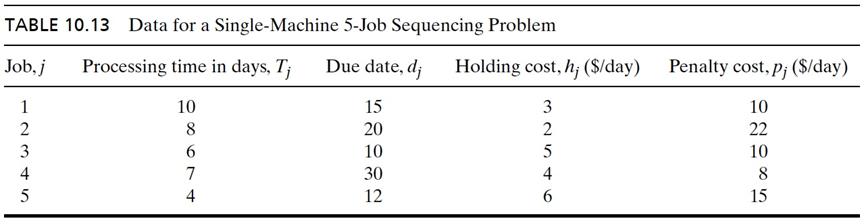<br>
    
- GA 파라미터 설정
    - Population size
    - (Crossover rate)
    - Mutation rate
    - Mutation selection rate
    - Iteration

In [ ]:
'''---------- 1.1 라이브러리 선언 ----------'''
import numpy as np
import time        # 연산 시간 측정을 위한 라이브러리

'''---------- 1.2 문제환경 정의 ----------'''
'''---------- 1.2.1 Job의 개수 및 데이터 정의 ----------'''
num_chrom = 5  # 염색체 크기(job의 개수)
t = [10, 8, 6, 7, 4]  # processing time
d = [15, 20, 10, 30, 12]  # due date
h = [3, 2, 5, 4, 6]  # holding cost
p = [10, 22, 10, 8, 15]  # penality cost

'''---------- 1.2.2 GA 초기 설정 ----------'''
population_size = int(4)  # 염색체 집단 크기
mutation_rate = float(0.1)
mutation_selection_rate = float(0.5)
num_mutation_chrom = round(num_chrom * mutation_selection_rate)  # 돌연변이 개수
num_iteration = int(2000)  # GA 최대 반복 횟수

## 2. 초기 집단(population) 생성
<br>
0부터 4까지의 숫자로 이루어진 순열을 5가지 작업(job)에 대한 순서로 표기 <br>
즉, [0, 1, 2, 3, 4]는 작업순서가 0번 → 1번 → 2번 → 3번 → 4번 순으로 작업을 진행<br>
파이썬 코드로 GA 초기 집단(population)을 생성하겠습니다.

In [ ]:
#2.1 단일 염색체 생성
chrom = list(np.random.permutation(num_chrom))
print('염색체; ', chrom)

In [ ]:
#(실습) 2.2 초기 집단 (염색체 집단) 생성
'''---------- 초기 집단(population) 생성 ----------'''
population_list = []  # GA 초기 집단
for i in range(population_size):
    chrom = list(np.random.permutation(num_chrom))  # chrom은 염색체를 의미
    population_list.append(chrom)
print('초기집단: ',population_list)

Hint) <span style='background-color:yellow'>for 반복문, np.random.permutation(), append() 함수 사용</span>

## 3.1. 단일 염색체 적합도 (fitness) 계산
<br>

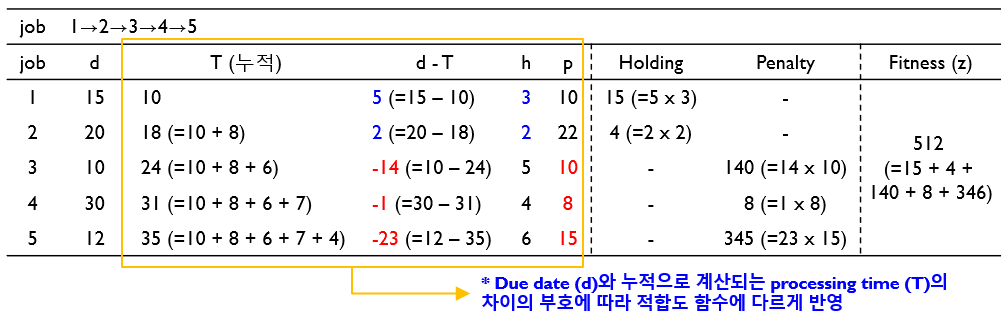<br>
파이썬 코드로 염색체 chrom = [0, 1, 2, 3, 4]에 대한 적합도 계산하겠습니다.

In [ ]:
t = [10, 8, 6, 7, 4]  # processing time
d = [15, 20, 10, 30, 12]  # due date
h = [3, 2, 5, 4, 6]  # holding cost
p = [10, 22, 10, 8, 15]  # penality cost

In [ ]:
#(실습) 3.1 단일 염색체 [0, 1, 2, 3, 4]에 대한 적합도 계산
chrom = [0, 1, 2, 3, 4]
fit = []
for i in range(num_chrom):
    if d[chrom[i]] >= sum([t[chrom[i]] for i in range(i + 1)]):  # d - T >= 0인 경우
        fit.append((d[chrom[i]] - sum([t[chrom[i]] for i in range(i + 1)])) * h[chrom[i]])
    else:  # d - T < 0인 경우
        fit.append((sum([t[chrom[i]] for i in range(i + 1)]) - d[chrom[i]]) * p[chrom[i]])
fit = sum(fit)
print('염색체 [0,1,2,3,4] 적합도: ',fit)

Hint) <span style='background-color:yellow'>for 반복문, if 조건문 활용, append() 함수 활용</span>

## 3.2. 염색체 집단 적합도 (fitness) 계산
<br>
파이썬 코드로 초기 집단(population)들에 대한 적합도 계산하겠습니다.

In [ ]:
#(실습) 3.2 (초기) 염색체 집단 적합도 계산
'''---------- 적합도(fitness) 계산 ----------'''
z = []  # 각 염색체 별 적합도 리스트
for i in range(population_size):
    fit = []
    for j in range(num_chrom):
        if d[population_list[i][j]] >= sum([t[population_list[i][j]] for j in range(j + 1)]):
            fit.append((d[population_list[i][j]] - sum([t[population_list[i][j]] for j in range(j + 1)])) * h[population_list[i][j]])
        else:
            fit.append((sum([t[population_list[i][j]] for j in range(j + 1)]) - d[population_list[i][j]]) * p[population_list[i][j]])
    z.append(sum(fit))
print('초기집단 적합도: ', z)

## 3.3. 적합도 (fitness) 산출 사용자정의함수 정의
<br>
파이썬 코드로 초기 집단(population)들에 대한 적합도를 계산하는<br>
사용자정의 함수를 작성하고, 사용자정의함수를 사용하여 염색체 집단의 적합도 계산하겠습니다.

- 사용자정의함수명: fitness
- 매개변수: chrom
- 반환값(return): 단일 염색체의 적합도 값

In [ ]:
#(실습) 3.3.1 적합도 함수 정의 (사용자정의함수)
'''---------- 적합도(fitness) 산출 사용자정의함수 정의 ----------'''
def fitness(chrom):
    fit = []
    for j in range(num_chrom):
        if d[chrom[j]] >= sum([t[chrom[j]] for j in range(j + 1)]):
            fit.append((d[chrom[j]] - sum([t[chrom[j]] for j in range(j + 1)])) * h[chrom[j]])
        else:
            fit.append((sum([t[chrom[j]] for j in range(j + 1)]) - d[chrom[j]]) * p[chrom[j]])
    return sum(fit)

chrom = [0, 1, 2, 3, 4]
fit = fitness(chrom)
print('염색체 [0,1,2,3,4] 적합도: ',fit)

Hint) <span style='background-color:yellow'>"13. 사용자정의함수 정의" 활용</span>

In [ ]:
#(실습) 3.3.2 적합도 함수를 이용한 적합도 계산
'''---------- 적합도(fitness) 계산 (사용자 정의함수 사용) ----------'''
z = []
for i in range(population_size):
    fit = fitness(population_list[i])
    z.append(fit)
print('초기집단 적합도: ', z)

## 4. 가장 좋은 해(염색체) 기록
<br>
초기 집단(population)들에 대해 적합도 기준으로 가장 좋은 염색체와 적합도 기록하겠습니다.

In [ ]:
population_list

In [ ]:
z

In [ ]:
#(실습) 4 가장 좋은 해(염색체) 기록
'''---------- 가장 좋은 해 기록 ----------'''
best_list = population_list[z.index(min(z))]
best_obj = min(z)
print('best 염색체: ', best_list)
print('best 적합도: ', best_obj)

Hint) <span style='background-color:yellow'>min() 함수,  index() 함수 활용</span>

## 5. 부모 염색체 선택
### < Roulette wheel selection 방법 >
<br>
pp.28 - 30에는 Roulette wheel selection 방법을 소개하고 있습니다.<br>
이 중 Minimization 문제에 적용할 수 있는 룰렛확률 산출 방법을 사용하겠습니다.<br>

- p_i = 1 / F(x_i)
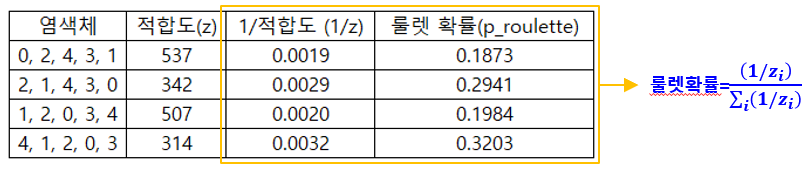

을 이용하겠습니다.

In [ ]:
#(실습) 5 Roulette wheel selection for minimization
p_roulette = []  # 룰렛 확률
z_inverse = [1/i for i in z]
for i in range(len(z_inverse)):  # or population_size
    p_roulette.append(z_inverse[i] / sum(z_inverse))
select_parent = np.random.choice(population_size, 2, p = p_roulette, replace = False)
parent_1 = population_list[select_parent[0]]
parent_2 = population_list[select_parent[1]]

print('부모로 선택된 염색체 위치: ', select_parent)
print('부모 염색체1: ', parent_1)
print('부모 염색체2: ', parent_2)

Hint) <span style='background-color:yellow'>“7. 기존 리스트의 원소들에 함수가 적용된 새로운 리스트 생성”, <br>
    for 반복문, append() 함수, np.random.choice() 함수 활용</span>

## 6. 단일점 교차(one-point crossover)
<br>
두 부모 염색체로부터 3번째 자리에서 단일점 교차(one-point crossover)를<br>
적용하는 방식으로 자손 염색체 생성하겠습니다.

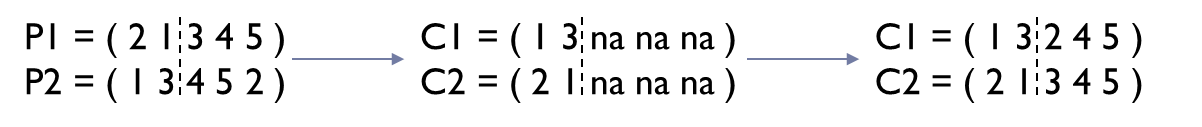

In [ ]:
#(실습) 6 단일점 교차
'''-------- 단일점 교차(one-point crossover) --------'''
cross_point = 2
child_1 = ['na' for i in range(num_chrom)]
child_2 = ['na' for i in range(num_chrom)]
for i in range(cross_point):
    child_1[i] = parent_2[i]
    child_2[i] = parent_1[i]
c1 = [parent_1[i] for i in range(num_chrom) if parent_1[i] not in child_1]
c2 = [parent_2[i] for i in range(num_chrom) if parent_2[i] not in child_2]
for i in range(num_chrom - cross_point):
    child_1[child_1.index('na')] = c1[i]
    child_2[child_2.index('na')] = c2[i]
offspring_list = [child_1, child_2]
print('자손 염색체: ', offspring_list)

Hint) <span style='background-color:yellow'>“8. N개의 ‘na’ 값을 가지는 리스트 생성”,<br>
    “9. 특정 리스트에 없는 원소들을 추출한 리스트 생성”,<br>
    “10. ‘na’가 존재하는 리스트 위치에 특정 값 대체” 활용</span>

## 7. 돌연변이(mutation)
<br>

p.37에는 Mutation 방법을 소개하고 있습니다.<br>
이 중 임의의 두 인자를 상호 교환하는 Exchange 방법을 사용하겠습니다.<br>
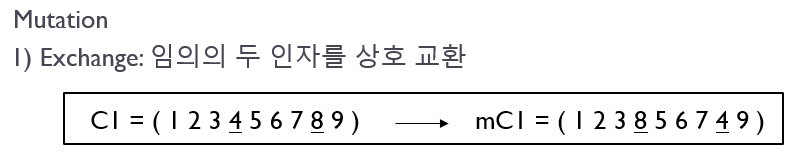
<br>

- '''---------- 1.2.2 GA 초기 설정 ----------'''
- population_size = int(4)
- mutation_rate = float(0.1)
- mutation_selection_rate = float(0.5)
- num_mutation_jobs = round(num_job * mutation_selection_rate)


1. mutation_rate >= 특정확률<br>
   -> 돌연변이 진행<br>
2. 염색체의 유전자(gene) 중 돌연변이 개수(num_mutation_jobs)만큼<br>
무작위로 추출해서 변경

In [ ]:
#(실습) 7 돌연변이
'''-------- 돌연변이(mutation) - Exchange --------''' 
for m in range(len(offspring_list)):
    mutation_prob = np.random.rand()
    print('mutation rate: ', mutation_rate)
    print('난수: ', mutation_prob, '\n')
    if mutation_rate >= mutation_prob:
        m_chg = list(np.random.choice(num_chrom, num_mutation_chrom, replace = False))
        print('돌연변이 적용 전 자손: ', offspring_list[m])
        print('돌연변이 적용 위치: ', m_chg)
        m_last = offspring_list[m][m_chg[0]]  # m_last는 돌연변이 적용 위치의 첫 번째 값
        print('돌연변이 적용 위치 첫 번째 값: ', m_last)
        for i in range(num_mutation_chrom - 1):
            offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]]
        offspring_list[m][m_chg[num_mutation_chrom - 1]] = m_last  # 돌연변이 마지막은 m_last가 됨
        print('돌연변이 적용 후 자손: ', offspring_list[m], '\n')
print('자손 염색체: ', offspring_list)

Hint) <span style='background-color:yellow'>for 반복문, np.random.rand(), np.random.choice() 함수 활용</span>

## 8. 열등한 염색체 두 가지 선택
<br>
염색체 집합에서 적합도가 가장 안 좋은 두 염색체를 자손 염색체와 교체하기 위해<br>
적합도가 가장 안 좋은 열등한 두 염색체 선택하겠습니다.

In [ ]:
z

In [ ]:
unique_nums = set(z)
sorted_nums = sorted(unique_nums, reverse = True)
z_filter = sorted_nums[:2]
z_filter  # 가장 안좋은 2가지 적합도 값

In [ ]:
#(실습) 8. 열등한 (적합도가 가장 안 좋은) 두 가지 선택
unique_nums = set(z)
sorted_nums = sorted(unique_nums, reverse = True)
z_filter = sorted_nums[:2]
inf = []
lst = [j for j, i in enumerate(z) if i == z_filter[0]]
if len(lst) >= 2:  # 가장 안 좋은 적합도 값에 대한 염색체가 2개 이상인 경우
    inf.append(list(np.random.choice(lst, 2, replace = False)))
else:  # 가장 안 좋은 적합도 값에 대한 염색체가 1개만 있는 경우
    inf.append(lst)
    lst2 = [j for j, i in enumerate(z) if i == z_filter[1]]
    inf.append(list(np.random.choice(lst2, 1, replace = False)))
inf = sum(inf, [])
print('열등한 두 염색체 위치:', inf)

Hint) <span style='background-color:yellow'>if문, set() 함수, sorted() 함수, np.random.choice() 함수 활용</span>

## 9. 부모 염색체 교체(parents replacement)
<br>
염색체 집합에서 적합도가 가장 안 좋은 두 염색체를 선택해서<br>
자녀 염색체와 교체하겠습니다.

In [ ]:
#(실습) 9 부모 염색체 교체(parents replacement)
'''-------- Parents replacement --------'''
for i in range(len(inf)):
    population_list[inf[i]] = offspring_list[i]
print('다음 세대 염색체 집합: ', population_list)

Hint) <span style='background-color:yellow'>for 반복문 활용</span>

## 10. GA 코드 iteration 반복
<br>

'''---------- 1.2.2 GA 초기 설정 ----------'''
- population_size = int(4)
- mutation_rate = float(0.1)
- mutation_selection_rate = float(0.5)
- num_mutation_jobs = round(num_job * mutation_selection_rate)
- num_iteration = int(2000)

<br>
사전에 지정한 iteration 반복 횟수(num_interation)만큼 실행하는 코드를 작성하겠습니다.

In [ ]:
#(실습) 10. GA 코드 iteration 반복 (GA main code)
'''---------- GA main code ----------'''
start_time = time.time()
'''---------- 3.1 초기 집단(population) 생성 ----------'''
population_list = []
for i in range(population_size):
    chrom = list(np.random.permutation(num_chrom))
    population_list.append(chrom)

for n in range(num_iteration):    
    '''---------- 3.2 적합도(fitness) 계산 ----------'''
    z = []
    for i in range(len(population_list)):
        fit = fitness(population_list[i])
        z.append(fit)
    '''---------- 3.3 가장 좋은 해 기록 ----------'''
    best_list = population_list[z.index(min(z))]
    best_obj = min(z)
    if n % 100 == 0:
        print('[Iter ' + str(n + 1) + '] best_list: ', best_list)
        print('[Iter ' + str(n + 1) + '] best_obj: ', best_obj)
    '''-------- 3.4 Parents selection --------'''
    p_roulette = []  # 룰렛 확률
    z_inverse = [1/i for i in z]
    for i in range(len(z_inverse)):
        p_roulette.append(z_inverse[i] / sum(z_inverse))
    select_parent = np.random.choice(population_size, 2, p = p_roulette, replace = False)
    parent_1 = population_list[select_parent[0]]
    parent_2 = population_list[select_parent[1]]

    '''-------- 3.5 단일점 교차(one-point crossover) --------'''
    cross_point = 2
    child_1 = ['na' for i in range(num_chrom)]
    child_2 = ['na' for i in range(num_chrom)]
    for i in range(cross_point):
        child_1[i] = parent_2[i]
        child_2[i] = parent_1[i]
    c1 = [parent_1[i] for i in range(num_chrom) if parent_1[i] not in child_1]
    c2 = [parent_2[i] for i in range(num_chrom) if parent_2[i] not in child_2]
    for i in range(num_chrom - cross_point):
        child_1[child_1.index('na')] = c1[i]
        child_2[child_2.index('na')] = c2[i]
    offspring_list = [child_1, child_2]
    '''-------- 3.6 돌연변이(mutation) --------''' 
    for m in range(len(offspring_list)):
        mutation_prob = np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg = list(np.random.choice(num_chrom, num_mutation_chrom, replace = False))
            m_last = offspring_list[m][m_chg[0]]
            for i in range(num_mutation_chrom - 1):
                offspring_list[m][m_chg[i]] = offspring_list[m][m_chg[i+1]]
            offspring_list[m][m_chg[num_mutation_chrom - 1]] = m_last
    '''-------- 3.7 Parents replacement --------'''
    unique_nums = set(z)
    sorted_nums = sorted(unique_nums, reverse = True)
    z_filter = sorted_nums[:2]
    inf = []
    lst = [j for j, i in enumerate(z) if i == z_filter[0]]
    if len(lst) >= 2:  # 가장 안 좋은 적합도 값에 대한 염색체가 2개 이상인 경우
        inf.append(list(np.random.choice(lst, 2, replace = False)))
    else:  # 가장 안 좋은 적합도 값에 대한 염색체가 1개만 있는 경우
        inf.append(lst)
        lst2 = [j for j, i in enumerate(z) if i == z_filter[1]]
        inf.append(list(np.random.choice(lst2, 1, replace = False)))
    inf = sum(inf, [])
    for i in range(len(inf)):
        population_list[inf[i]] = offspring_list[i]

## 11. 결과도출
<br>
GA의 iteration이 완료된 이후 최종 결과를 도출하겠습니다.

In [ ]:
'''-------- 4. 결과 도출 --------'''
print('최적 작업순서: ', best_list)
print('목적함수 최적값: ', best_obj)
print('연산 시간: %s'% (time.time() - start_time))